In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [3]:
img_width = 180
img_height =180 

In [4]:
import tensorflow as tf

data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


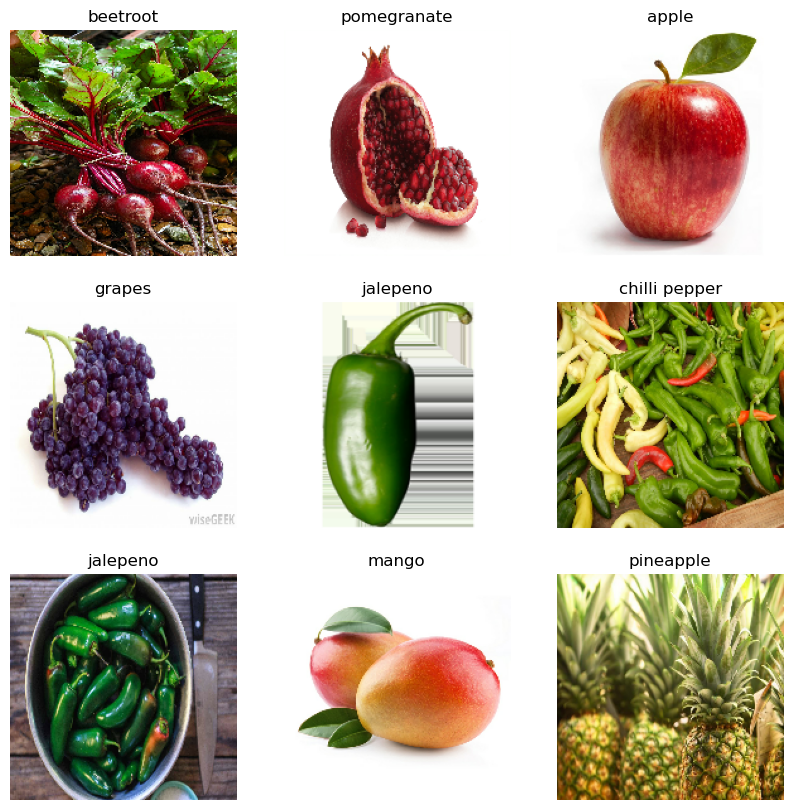

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
# Model Building
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(124, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
# Training epochs
epochs_size = 30
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 60s 532ms/step - accuracy: 0.0493 - loss: 3.5665 - val_accuracy: 0.2621 - val_loss: 2.7693
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 53s 539ms/step - accuracy: 0.1874 - loss: 2.8514 - val_accuracy: 0.4758 - val_loss: 1.9042
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 84s 858ms/step - accuracy: 0.3108 - loss: 2.3098 - val_accuracy: 0.5499 - val_loss: 1.5146
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 46s 463ms/step - accuracy: 0.3992 - loss: 1.9995 - val_accuracy: 0.7151 - val_loss: 1.1159
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 514ms/step - accuracy: 0.5079 - loss: 1.6910 - val_accuracy: 0.7493 - val_loss: 0.9257
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 76s 450ms/step - accuracy: 0.5663 - loss: 1.4207 - val_accuracy: 0.7692 - val_loss: 0.8672
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 54s 541ms/step - accuracy: 0.6470 - loss: 1.1826 - val_accuracy: 0.8319 - val_loss: 0.7110
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 514ms/step - accuracy: 0.7253 - loss: 0.9399 - val_accu

Text(0.5, 1.0, 'Loss')

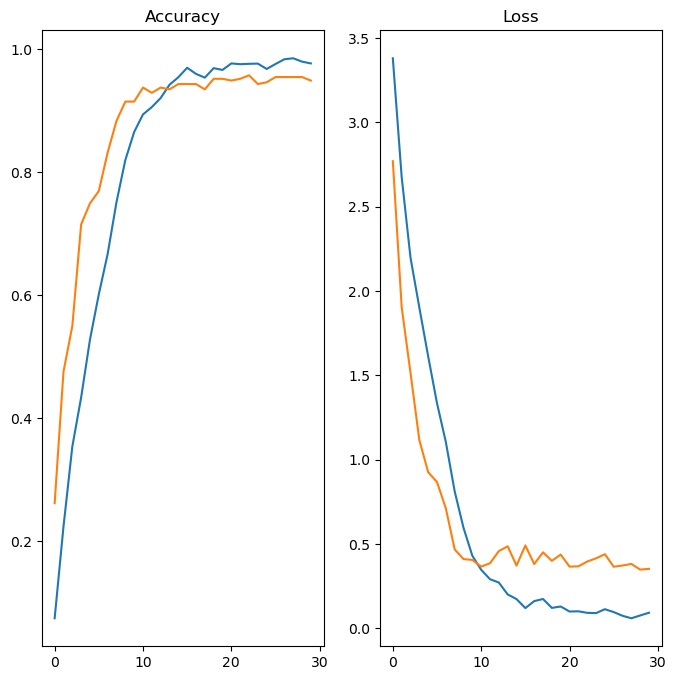

In [15]:
# Accuracy & Loss Plots
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [63]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [64]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [65]:
score = tf.nn.softmax(predict)

In [66]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 92.36


In [67]:
recipes = {
    'apple': ['Apple Pie', 'Apple Crumble', 'Apple Smoothie'],
    'banana': ['Banana Bread', 'Banana Smoothie', 'Banana Pancakes'],
    'beetroot': ['Beetroot Soup', 'Beetroot Salad'],
    'bell pepper': ['Stuffed Bell Peppers', 'Bell Pepper Stir Fry'],
    'cabbage': ['Cabbage Soup', 'Cabbage Stir Fry', 'Coleslaw'],
    'capsicum': ['Capsicum Pizza', 'Capsicum Curry'],
    'carrot': ['Carrot Soup', 'Carrot Cake', 'Carrot Salad'],
    'cauliflower': ['Cauliflower Rice', 'Cauliflower Soup'],
    'chilli pepper': ['Chilli Sauce', 'Chilli Stir Fry'],
    'corn': ['Corn Soup', 'Grilled Corn'],
    'cucumber': ['Cucumber Salad', 'Cucumber Smoothie'],
    'eggplant': ['Eggplant Parmesan', 'Eggplant Stir Fry'],
    'garlic': ['Garlic Bread', 'Garlic Sauce'],
    'ginger': ['Ginger Tea', 'Ginger Soup'],
    'grapes': ['Grape Juice', 'Grape Salad'],
    'jalepeno': ['Jalapeño Poppers', 'Spicy Jalapeño Dip'],
    'kiwi': ['Kiwi Smoothie', 'Kiwi Salad'],
    'lemon': ['Lemonade', 'Lemon Cake', 'Lemon Tea'],
    'lettuce': ['Lettuce Wraps', 'Lettuce Salad'],
    'mango': ['Mango Smoothie', 'Mango Salad', 'Mango Ice Cream'],
    'onion': ['Onion Soup', 'Fried Onions'],
    'orange': ['Orange Juice', 'Orange Cake', 'Orange Salad'],
    'paprika': ['Paprika Chicken', 'Paprika Sauce'],
    'pear': ['Pear Pie', 'Pear Salad'],
    'peas': ['Peas Soup', 'Peas Pulao'],
    'pineapple': ['Pineapple Pizza', 'Pineapple Smoothie', 'Pineapple Upside-Down Cake'],
    'pomegranate': ['Pomegranate Juice', 'Pomegranate Salad'],
    'potato': ['Mashed Potatoes', 'Potato Fries', 'Potato Salad'],
    'raddish': ['Radish Salad', 'Pickled Radish'],
    'soy beans': ['Soybean Stir Fry', 'Soybean Soup'],
    'spinach': ['Spinach Soup', 'Creamed Spinach'],
    'sweetcorn': ['Sweetcorn Soup', 'Sweetcorn Salad'],
    'sweetpotato': ['Sweet Potato Fries', 'Sweet Potato Soup'],
    'tomato': ['Tomato Soup', 'Tomato Pasta', 'Tomato Salad'],
    'turnip': ['Turnip Soup', 'Mashed Turnips'],
    'watermelon': ['Watermelon Juice', 'Watermelon Salad']
}

In [ ]:
def suggest_recipes(predict):
    if predict in recipes:
        return recipes[predicted_class]
    else:
        return ["No recipes available for this category."]


score = tf.nn.softmax(predict)
predicted_class_index = np.argmax(score, axis=-1)
predicted_class = data_cat[predicted_class_index[0]]

suggested_recipes = suggest_recipes(predicted_class)

print(f"Suggested Recipes for {predicted_class}:")
for recipe in suggested_recipes:
    print(f"- {recipe}")


Suggested Recipes for corn:
- Corn Soup
- Grilled Corn


In [70]:
prices = {
        'apple': '3 USD per kg',
        'banana': '1.5 USD per kg',
        'beetroot': '2.5 USD per kg',
        'bell pepper': '2.8 USD per kg',
        'cabbage': '1.2 USD per kg',
        'capsicum': '3 USD per kg',
        'carrot': '1.7 USD per kg',
        'cauliflower': '2.3 USD per kg',
        'chilli pepper': '4 USD per kg',
        'corn': '0.8 USD per kg',
        'cucumber': '1.5 USD per kg',
        'eggplant': '2.2 USD per kg',
        'garlic': '5 USD per kg',
        'ginger': '4.5 USD per kg',
        'grapes': '3.5 USD per kg',
        'jalepeno': '3.2 USD per kg',
        'kiwi': '4.5 USD per kg',
        'lemon': '1.3 USD per kg',
        'lettuce': '1 USD per kg',
        'mango': '2 USD per kg',
        'onion': '1.1 USD per kg',
        'orange': '2.5 USD per kg',
        'paprika': '3.5 USD per kg',
        'pear': '3 USD per kg',
        'peas': '2.2 USD per kg',
        'pineapple': '4 USD per kg',
        'pomegranate': '4.5 USD per kg',
        'potato': '0.5 USD per kg',
        'raddish': '2 USD per kg',
        'soy beans': '3 USD per kg',
        'spinach': '1.5 USD per kg',
        'sweetcorn': '1.8 USD per kg',
        'sweetpotato': '2.3 USD per kg',
        'tomato': '1.2 USD per kg',
        'turnip': '2.5 USD per kg',
        'watermelon': '3 USD per kg'
    }

In [ ]:
def get_price(predict):
    if predict in prices:
        return prices[predict]
    else:
        return "No price data available for this category."

model_output = model.predict(img_bat)  

score = tf.nn.softmax(model_output)  

predicted_class_index = np.argmax(score, axis=-1)  
predicted_class = data_cat[predicted_class_index[0]]  

predict = predicted_class.strip().lower()
price = get_price(predict)

print(f"The price of {predict} is {price}.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
The price of corn is 0.8 USD per kg.


In [76]:
top_producers = {
        'apple': ['China', 'USA', 'Poland', 'India'],
        'banana': ['India', 'China', 'Indonesia', 'Brazil'],
        'beetroot': ['Russia', 'India', 'USA', 'Poland'],
        'bell pepper': ['China', 'Mexico', 'Turkey', 'Indonesia'],
        'cabbage': ['China', 'India', 'Russia', 'USA'],
        'capsicum': ['Mexico', 'China', 'Turkey', 'USA'],
        'carrot': ['China', 'Russia', 'USA', 'India'],
        'cauliflower': ['China', 'India', 'USA', 'Italy'],
        'chilli pepper': ['China', 'India', 'Mexico', 'Thailand'],
        'corn': ['USA', 'China', 'Brazil', 'Argentina'],
        'cucumber': ['China', 'India', 'Russia', 'Turkey'],
        'eggplant': ['China', 'India', 'Egypt', 'Turkey'],
        'garlic': ['China', 'India', 'Argentina', 'Egypt'],
        'ginger': ['India', 'China', 'Nigeria', 'Indonesia'],
        'grapes': ['China', 'Italy', 'USA', 'Spain'],
        'jalepeno': ['Mexico', 'USA', 'Brazil', 'India'],
        'kiwi': ['Italy', 'New Zealand', 'Chile', 'Greece'],
        'lemon': ['India', 'Mexico', 'Argentina', 'Spain'],
        'lettuce': ['China', 'USA', 'Spain', 'India'],
        'mango': ['India', 'China', 'Thailand', 'Indonesia'],
        'onion': ['China', 'India', 'USA', 'Russia'],
        'orange': ['Brazil', 'USA', 'India', 'China'],
        'paprika': ['Mexico', 'Spain', 'Turkey', 'Hungary'],
        'pear': ['China', 'USA', 'Argentina', 'Italy'],
        'peas': ['China', 'India', 'USA', 'Russia'],
        'pineapple': ['Costa Rica', 'Philippines', 'Thailand', 'India'],
        'pomegranate': ['India', 'Iran', 'China', 'USA'],
        'potato': ['China', 'India', 'Russia', 'USA'],
        'raddish': ['China', 'India', 'USA', 'Mexico'],
        'soy beans': ['USA', 'Brazil', 'Argentina', 'China'],
        'spinach': ['China', 'USA', 'India', 'Italy'],
        'sweetcorn': ['USA', 'China', 'Brazil', 'India'],
        'sweetpotato': ['China', 'USA', 'Nigeria', 'Indonesia'],
        'tomato': ['China', 'India', 'USA', 'Turkey'],
        'turnip': ['China', 'India', 'Russia', 'USA'],
        'watermelon': ['China', 'Turkey', 'India', 'Brazil']
        
    }

In [77]:
def get_top_producers(predict):
    if predict in top_producers:
        return top_producers[predict]
    else:
        return ["No top producers available for this category."]
print(f"Top Producers for '{predict}':")
for country in top_producers_list:
    print(f"- {country}")


Top Producers for 'corn':
- USA
- China
- Brazil
- Argentina


In [78]:
import numpy as np
import tensorflow as tf
def suggest_recipes(predict):
    if predict in recipes:
        return recipes[predict]
    else:
        return ["No recipes available for this category."]
print(f"Suggested Recipes for '{predict}':")
for recipe in suggested_recipes:
    print(f"- {recipe}")



Suggested Recipes for 'corn':
- Corn Soup
- Grilled Corn


In [46]:
health_benefits_dict = {
        'apple': 'Good source of fiber and Vitamin C.',
        'banana': 'High in potassium, supports heart health.',
        'beetroot': 'Rich in antioxidants, supports blood pressure.',
        'bell pepper': 'Packed with Vitamin C, helps immune system.',
        'cabbage': 'High in fiber, supports digestion.',
        'capsicum': 'Rich in Vitamin A and C, good for eyes.',
        'carrot': 'Rich in Vitamin A, good for vision.',
        'cauliflower': 'High in fiber, supports heart health.',
        'chilli pepper': 'Boosts metabolism, high in Vitamin C.',
        'corn': 'Rich in fiber, good for digestion.',
        'cucumber': 'Hydrating, helps in weight management.',
        'eggplant': 'Low in calories, supports heart health.',
        'garlic': 'Has antibacterial properties, supports immune system.',
        'ginger': 'Helps with digestion, reduces inflammation.',
        'grapes': 'Rich in antioxidants, supports heart health.',
        'jalepeno': 'Boosts metabolism, high in Vitamin C.',
        'kiwi': 'Rich in Vitamin C, supports immune function.',
        'lemon': 'High in Vitamin C, supports immune system.',
        'lettuce': 'Low in calories, good for hydration.',
        'mango': 'Rich in Vitamin C, supports immune system.',
        'onion': 'Good for heart health, anti-inflammatory.',
        'orange': 'Rich in Vitamin C, supports immune function.',
        'paprika': 'High in Vitamin A, supports vision.',
        'pear': 'Good source of fiber, supports digestion.',
        'peas': 'Rich in protein, supports muscle growth.',
        'pineapple': 'Rich in Vitamin C, helps with digestion.',
        'pomegranate': 'Rich in antioxidants, supports heart health.',
        'potato': 'Good source of carbohydrates, provides energy.',
        'raddish': 'Helps with digestion, good for skin.',
        'soy beans': 'High in protein, supports muscle growth.',
        'spinach': 'Rich in iron, supports healthy blood flow.',
        'sweetcorn': 'Good source of fiber and carbohydrates.',
        'sweetpotato': 'Rich in Vitamin A, supports vision.',
        'tomato': 'High in antioxidants, supports heart health.',
        'turnip': 'Rich in Vitamin C, supports immune system.',
        'watermelon': 'Hydrating, good for skin health.'
    }

In [79]:
def get_health_benefits(predict):
    if predict in health_benefits_dict:
        return health_benefits_dict[predict]
    else:
        return ["No health data available for this category."]
print(f"\nHealth Benefits of '{predict}': {health_benefits[0]}")



Health Benefits of 'corn': R


In [80]:
season_dict = {
        'apple': 'Fall',
        'banana': 'Year-round',
        'beetroot': 'Spring, Fall',
        'bell pepper': 'Spring, Summer',
        'cabbage': 'Spring, Fall',
        'capsicum': 'Spring, Summer',
        'carrot': 'Spring, Fall',
        'cauliflower': 'Fall',
        'chilli pepper': 'Summer',
        'corn': 'Summer',
        'cucumber': 'Summer',
        'eggplant': 'Summer',
        'garlic': 'Spring',
        'ginger': 'Year-round',
        'grapes': 'Summer, Fall',
        'jalepeno': 'Summer',
        'kiwi': 'Winter, Spring',
        'lemon': 'Year-round',
        'lettuce': 'Spring, Fall',
        'mango': 'Summer',
        'onion': 'Year-round',
        'orange': 'Winter, Spring',
        'paprika': 'Summer',
        'pear': 'Fall',
        'peas': 'Spring',
        'pineapple': 'Year-round',
        'pomegranate': 'Fall',
        'potato': 'Spring, Fall',
        'raddish': 'Spring, Fall',
        'soy beans': 'Summer',
        'spinach': 'Fall, Winter',
        'sweetcorn': 'Summer',
        'sweetpotato': 'Fall',
        'tomato': 'Summer',
        'turnip': 'Fall',
        'watermelon': 'Summer'
        
    }

In [81]:
# season
def get_seasonality(predict):
    if predict in season_dict:
        return season_dict[predict]
    else:
        return ["No season data available for this category."]

season_info = get_seasonality(predict)
print(f"The season of {predict} is {season_info}")

The season of corn is Summer


In [ ]:
"""camera_image = st.camera_input("Capture Image From Camera")

if camera_image is not None:
    image = Image.open(camera_image)
    st.image(image, caption='Captured Image', use_column_width=True)

    image = image.resize((img_width, img_height))  
    img_arr = np.array(image)  
    img_bat = np.expand_dims(img_arr, axis=0)  

    predict = model.predict(img_bat)
    score = tf.nn.softmax(predict)

    st.write('Predicted Veg/Fruit: ' + data_cat[np.argmax(score)])
    st.write('With accuracy of: ' + str(np.max(score) * 100) + '%')
    st.write('and common recipes is:' + suggest_recipes(predict))
    st.write('and price of Veg/Fruit is:' +  get_price_by_category(predict))
    st.write('and common producers are:' + get_top_producers(predict))
    st.write('and the health benefits are:' + get_health_benefits(predict))
    st.write('and the season is :' + get_seasonality(predict))"""

In [82]:
model.save('Image_classify_model.keras')

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import load_model
import streamlit as st
import numpy as np
from PIL import Image
import io

st.header('Image Classification Model')

model = load_model(r'E://3rd//deep//deep project//DEEP PROJECT//Image_classification//final project//best//New folder//Image_classify_model.keras')

data_cat = ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower',
            'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi',
            'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate',
            'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']

img_height = 180
img_width = 180



uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_column_width=True)

    image = image.resize((img_width, img_height))  
    img_arr = np.array(image)  
    img_bat = np.expand_dims(img_arr, axis=0)  

    model_output = model.predict(img_bat)  

    score = tf.nn.softmax(model_output)  

    predicted_class_index = np.argmax(score, axis=-1)  
    predicted_class = data_cat[predicted_class_index[0]]  

    predict = predicted_class.strip().lower()

    st.write('Predicted Veg/Fruit: ' + data_cat[np.argmax(score)])
    st.write('With accuracy of: ' + str(np.max(score) * 100) + '%')
    st.write('and common recipes is:' + get_price(predict))
    st.write('and price of Veg/Fruit is:' +  suggest_recipes(predict))
    st.write('and common producers are:' + get_top_producers(predict))
    st.write('and the health benefits are:' + get_health_benefits(predict))
    st.write('and the season is :' + get_seasonality(predict))
